# Mise en contexte du projet

<img src="/home/leferre/Bureau/Fac/base de données/Projet/Stardle_Data_Base/Capture d’écran du 2025-03-04 15-58-14.png" alt="Exemple de Stardle" />

# Création du jeu de données

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ship = pd.read_json("shipDB_All.json").T

stardle = pd.read_json("shipDB_Stardle.json").T

**Premiere base de données**

In [3]:
ship.head()

,uuid,name,slug,class_name,sizes,emission,mass,cargo_capacity,vehicle_inventory,personal_inventory,...,version,id,chassis_id,production_status,production_note,size,msrp,pledge_url,loaner,skus
100i,6135a874-4cb1-4f49-9f29-5781e5991f2b,100i,100i,ORIG_100i,"{'length': 19, 'beam': 12, 'height': 5}","{'ir': 7472, 'em_idle': 6263, 'em_max': 20675}",48143,2,0.93,0,...,3.24.3-LIVE.9423704,159,63,flight-ready,None,small,50,https://robertsspaceindustries.com/pledge/ship...,[],"[{'title': '100i Holiday Upgrade', 'price': 50..."
125a,e7eeba8d-b108-48a1-a332-d9edbab2b9c1,125a,125a,ORIG_125a,"{'length': 19, 'beam': 12, 'height': 5}","{'ir': 7537, 'em_idle': 6313, 'em_max': 21928}",48143,2,0.93,0,...,3.24.3-LIVE.9423704,160,63,flight-ready,None,small,60,https://robertsspaceindustries.com/pledge/ship...,[],"[{'title': 'Standard Edition', 'price': 60, 'a..."
135c,2f231daa-95e5-4cb2-a32e-4db8f29a30d6,135c,135c,ORIG_135c,"{'length': 19, 'beam': 12, 'height': 5}","{'ir': 7340, 'em_idle': 6263, 'em_max': 22006}",48143,0,0.93,0,...,3.24.3-LIVE.9423704,161,63,flight-ready,None,small,65,https://robertsspaceindustries.com/pledge/ship...,[],"[{'title': 'Standard Edition', 'price': 65, 'a..."
300i,ce937681-caa2-4cfa-ab80-f5bf2a5b9a6c,300i,300i,ORIG_300i,"{'length': 27, 'beam': 17, 'height': 8}","{'ir': 6920, 'em_idle': 5988, 'em_max': 20379}",79677,8,1.01,0.65,...,3.24.3-LIVE.9423704,7,2,flight-ready,Rework complete (3.5.0),small,60,https://robertsspaceindustries.com/pledge/ship...,[],"[{'title': 'Standard Edition', 'price': 60, 'a..."
315p,dc537d66-2abb-43aa-9d37-4e963fc6e9e2,315p,315p,ORIG_315p,"{'length': 27, 'beam': 17, 'height': 8}","{'ir': 7213, 'em_idle': 5996, 'em_max': 20339}",80592,12,0.93,0.65,...,3.24.3-LIVE.9423704,8,2,flight-ready,None,small,65,https://robertsspaceindustries.com/pledge/ship...,[],"[{'title': 'Standard Edition', 'price': 65, 'a..."


In [4]:
ship.shape

(230, 36)

# Description de la base de données shipDB_All.json

## Exemple d'entrée
Pour le vaisseau "300i" :
- UUID: ce937681-caa2-4cfa-ab80-f5bf2a5b9a6c
- Nom: 300i
- Classe: ORIG_300i
- Taille: Petit (small)
- Dimensions: 27m x 17m x 8m
- Masse: 79677
- Capacité de cargo: 8
- Équipage: Min 1
- Points de santé: 8200
- Bouclier: 3000 HP
- Vitesse: SCM 260, Max 1425
- Prix: 60 MSRP

## Fabricants présents
20 fabricants sont présents dans la base, notamment:
- Aegis Dynamics
- Anvil Aerospace
- Origin Jumpworks
- Roberts Space Industries
- Drake Interplanetary
- MISC
- Crusader Industries
et d'autres

## Structure des données
Chaque vaisseau contient des informations détaillées comme:
- Spécifications techniques (taille, masse, vitesse)
- Capacités (cargo, équipage, carburant)
- Performances (agilité, blindage, émissions)
- Structure physique (pièces et composants)
- Informations commerciales (prix, URL de vente)
- Statut de production
- Description



## Deuxieme base de données

In [5]:
stardle.head()

,name,description,dimensions,cargo_capacity,mass,crew,speed,manufacturer,type,status,role,price,release_date
100i,100i,Tour the universe with the perfect coupling of...,19,2,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",50.0,2020
125a,125a,"Risks were meant to be taken, but why risk run...",19,2,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",60.0,2020
135c,135c,With a deceptive amount of storage space in it...,19,6,48143,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",65.0,2020
300i,300i,If you're going to travel the stars... why not...,27,8,79677,1,1425,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",60.0,2014
315p,315p,Exploration is man's highest calling. Prepare ...,27,12,80592,1,1425,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},65.0,2014


In [6]:
stardle.shape

(202, 13)

## Différences avec shipDB_All.json
Cette base de données est une version plus compacte et épurée que shipDB_All.json:
- Moins d'entrées (202 contre 230)
- Structure simplifiée (13 champs principaux contre des dizaines dans la version complète)
- Informations essentielles conservées, détails techniques avancés omis
- Format plus adapté pour des applications légères ou des interfaces utilisateur



## Base de données des prix en jeu

In [7]:
ingame = pd.read_csv('#DPSCalculatorCART(1).csv')
ingame.head()

,Name,Shop,Location,System,Quantity,Price,Unnamed: 6
0,Avenger Stalker,New Deal,Lorville,Stanton,1,1587600,NaN
1,Avenger Titan,New Deal,Lorville,Stanton,1,1358280,NaN
2,Avenger Warlock,New Deal,Lorville,Stanton,1,2249100,NaN
3,Eclipse,New Deal,Lorville,Stanton,1,7938000,NaN
4,Gladius,New Deal,Lorville,Stanton,1,2381400,NaN


In [8]:
ingame.shape

(135, 7)

# Base de données finale

In [9]:
DB = pd.read_csv('NE PAS TOUCHER.csv',na_values = ['               ','       '])
DB['price_ingame   '] = pd.to_numeric(DB['price_ingame   '], errors='coerce')
DB['mass      '] = pd.to_numeric(DB['mass      '], errors='coerce')

DB

,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,price_ingame,scm,max,length,beam,height
0,100i,2,48143.0,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",50.0,2020,1146600.0,260.0,1425.0,19.00,12.00,5.00
1,125a,2,48143.0,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",60.0,2020,1587600.0,260.0,1425.0,19.00,12.00,5.00
2,135c,6,48143.0,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",65.0,2020,1490580.0,260.0,1425.0,19.00,12.00,5.00
3,300i,8,79677.0,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",60.0,2014,1375920.0,260.0,1425.0,27.00,17.00,8.00
4,315p,12,80592.0,1,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},65.0,2014,1490580.0,260.0,1425.0,27.00,17.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,X1 Force,0,4730.0,1,Origin Jumpworks,exploration,flight-ready,{'0': 'Combat'},50.0,2023,132300.0,207.0,569.0,1.55,5.19,1.87
197,X1 Velocity,0,4730.0,1,Origin Jumpworks,competition,flight-ready,{'0': 'Racing'},45.0,2023,119070.0,222.0,611.0,1.55,5.19,1.87
198,Zeus CL Mk II,128,295000.0,3,Roberts Space Industries,transport,flight-ready,{'0': 'Medium Freight'},150.0,2024,6804000.0,200.0,1000.0,45.70,34.30,7.00
199,Zeus ES Mk II,32,295000.0,3,Roberts Space Industries,exploration,flight-ready,{'0': 'Expedition'},150.0,2024,4422600.0,200.0,1050.0,45.70,34.30,7.00


# Standardisation des données

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original DataFrame for comparison
n_df = DB.copy()
# Identify numerical columns
numerical_columns = n_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical columns identified: {numerical_columns}")

# Create and fit the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns and replace original values
n_df[numerical_columns] = scaler.fit_transform(n_df[numerical_columns])


# Display summary statistics for comparison
print("\nOriginal DataFrame - Summary Statistics:")
print(DB[numerical_columns].describe())

print("\nNormalized DataFrame - Summary Statistics:")
print(n_df[numerical_columns].describe())

print("\nStandardization completed successfully!")
print("Note: After standardization, each numerical column should have a mean of ~0 and standard deviation of ~1.")


n_df.to_csv('normalized_db.csv', index=False)


Numerical columns identified: ['cargo_capacity ', 'mass      ', 'crew ', 'price  ', 'price_ingame   ', 'scm    ', 'max    ', 'length ', 'beam   ', 'height']

Original DataFrame - Summary Statistics:
       cargo_capacity     mass             crew       price    \
count       201.000000  1.790000e+02  201.000000   201.000000   
mean        755.288557  2.089056e+06    3.129353   237.786070   
std        7092.972497  1.002899e+07    6.380688   334.565687   
min           0.000000  1.440000e+03    1.000000     0.000000   
25%           0.000000  3.896550e+04    1.000000    60.000000   
50%           0.000000  8.059200e+04    2.000000   150.000000   
75%          46.000000  3.216360e+05    3.000000   275.000000   
max       98304.000000  1.110805e+08   80.000000  3000.000000   

       price_ingame         scm          max         length      beam     \
count     1.480000e+02   171.000000   167.000000  201.000000  201.000000   
mean      5.561448e+06   192.956140   957.434132   45.854677  

In [11]:
n_df.head()

,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,price_ingame,scm,max,length,beam,height
0,100i,-0.106467,-0.204072,-0.334552,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",-0.562685,2020,-0.469479,0.425948,1.104798,-0.458320,-0.587413,-0.472449
1,125a,-0.106467,-0.204072,-0.334552,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",-0.532720,2020,-0.422583,0.425948,1.104798,-0.458320,-0.587413,-0.472449
2,135c,-0.105902,-0.204072,-0.334552,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",-0.517738,2020,-0.432900,0.425948,1.104798,-0.458320,-0.587413,-0.472449
3,300i,-0.105619,-0.200919,-0.334552,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",-0.532720,2014,-0.445093,0.425948,1.104798,-0.321787,-0.411807,-0.286839
4,315p,-0.105054,-0.200828,-0.334552,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},-0.517738,2014,-0.432900,0.425948,1.104798,-0.321787,-0.411807,-0.286839


# Visualisation des données

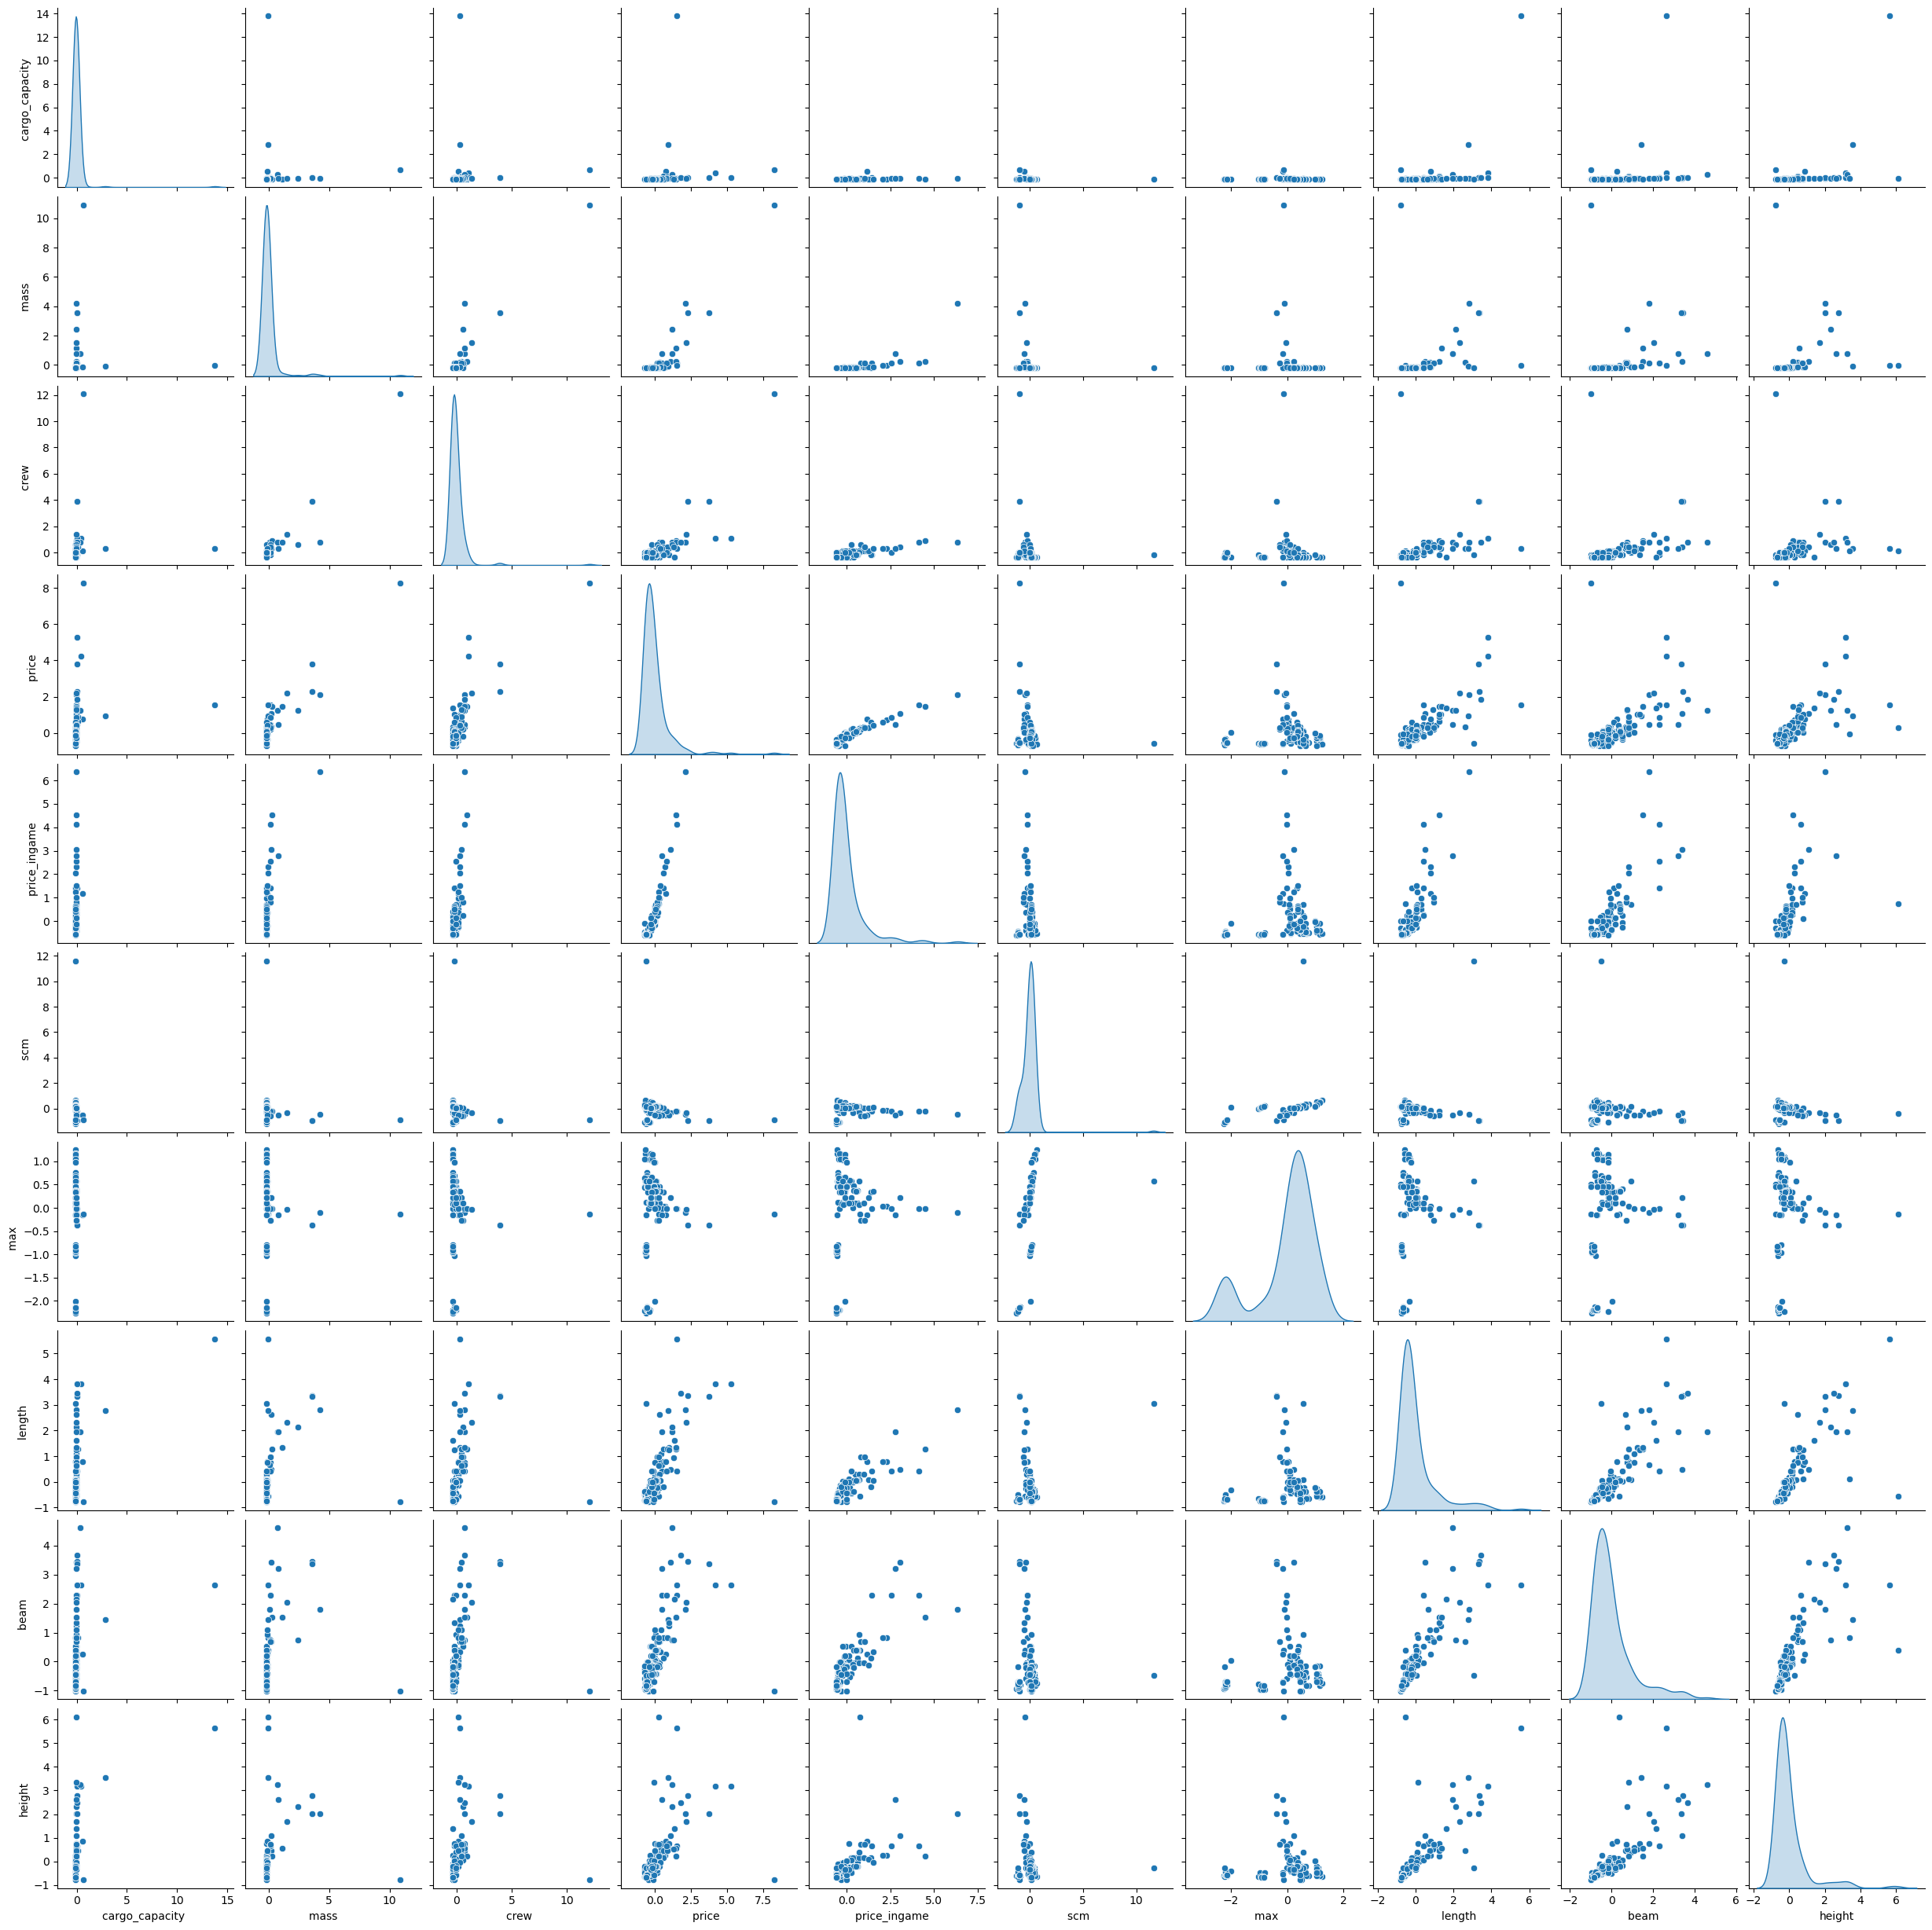

In [12]:
sns.pairplot(n_df, kind='scatter', diag_kind='kde')
plt.savefig('pairplot.png')

<img src="/home/leferre/Bureau/Fac/base de données/Projet/Stardle_Data_Base/pairplot.png" alt="Affichage descritive des données" />

## Heatmap pour visualiser les corrélations entre les variables

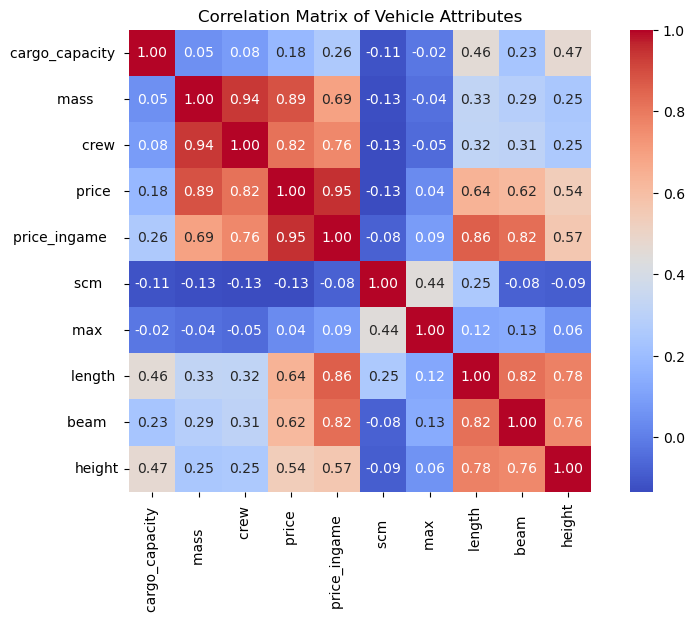

<Figure size 640x480 with 0 Axes>

In [13]:
colonnes_numeriques = n_df.select_dtypes(include=['int64', 'float64'])

correlation = colonnes_numeriques.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Vehicle Attributes')
plt.show()
plt.savefig('heatmap.png')

# Etudes des liens entre les prix et prix en jeu

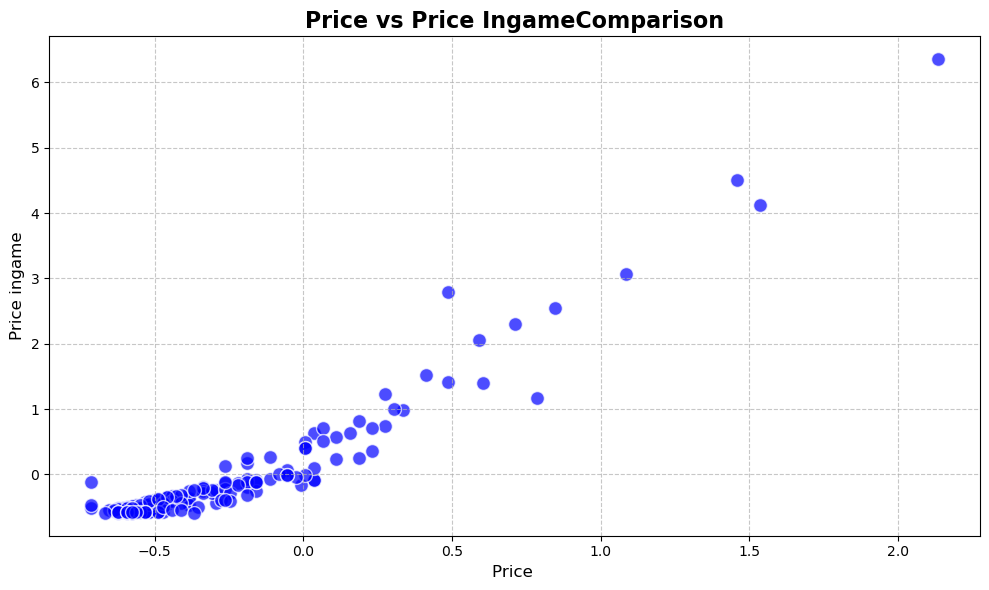

Number of data points: 148
Correlation coefficient: 0.9475111545125124


In [14]:
import matplotlib.pyplot as plt
# Clean and convert price and mass columns to numeric values
# This ensures any string values or other non-numeric data is properly handled
n_df['price  '] = pd.to_numeric(n_df['price  '], errors='coerce')
n_df['price_ingame   '] = pd.to_numeric(n_df['price_ingame   '], errors='coerce')

# Drop rows where either price or mass is NaN
df_clean = n_df.dropna(subset=['price  ', 'price_ingame   '])

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['price  '], df_clean['price_ingame   '], alpha=0.7, c='blue', edgecolors='w', s=100)

# Add title and labels
plt.title('Price vs Price IngameComparison', fontsize=16, fontweight='bold')
plt.xlabel('Price ', fontsize=12)
plt.ylabel('Price ingame', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve aesthetics
plt.tight_layout()

# Display the plot
plt.show()  # Display the figure

# Print some basic statistics
print("Number of data points:", len(df_clean))
print("Correlation coefficient:", df_clean['price_ingame   '].corr(df_clean['price  ']))

## Regression lineaire et polynomiale

Pente :  [2.08437996]
Ordonnée à l'origine :  0.5016263321103911
Racine carrée de l'erreur quadratique moyenne :  0.10478441694767862
Sccore R2 :  0.8553536322507079


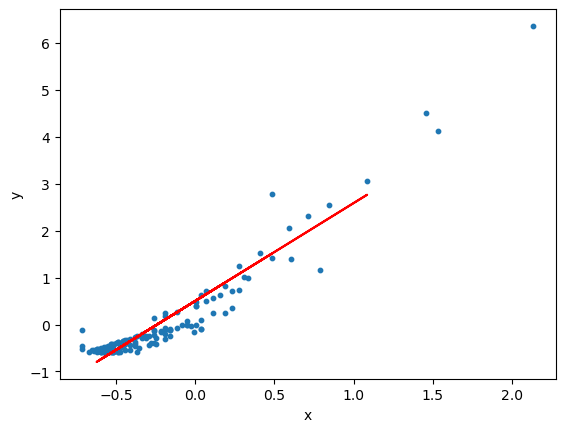

In [15]:
# Importations
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Extract the features and target
X = n_df['price  '].values  
y = n_df['price_ingame   '].values  

# Drop any rows with NaN values
valid_indices = ~(np.isnan(X) | np.isnan(y))
X = X[valid_indices]
y = y[valid_indices]

# initialisation du modèle
regression_model = linear_model.Ridge(alpha= 0.0)
# Adapter les données (entraînement du modèle)
X_reshaped = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped,y, test_size=0.2,)
regression_model.fit(X_train,y_train)
# Prédiction
y_predicted = regression_model.predict(X_test)
# Évaluation du modèle
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
# Affichage des valeurs
print("Pente : " ,regression_model.coef_)
print("Ordonnée à l'origine : ", regression_model.intercept_)
print("Racine carrée de l'erreur quadratique moyenne : ", rmse)
print('Sccore R2 : ', r2)
# Tracée des valeurs
# Points de données
plt.scatter(X_reshaped, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
# Valeurs prédites
plt.plot(X_test, y_predicted, color='r')
plt.show()

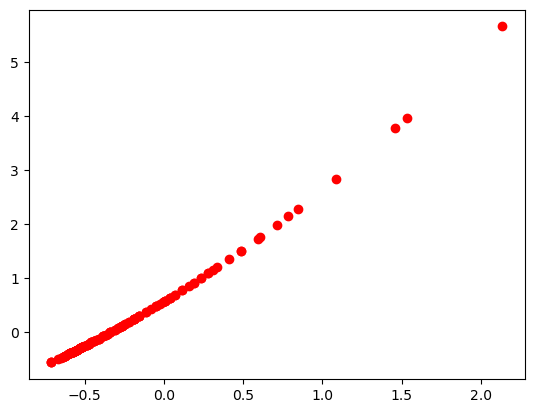

In [16]:
coeff = np.polyfit(X, y, 2)

def f(x):
    return coeff[0]+coeff[1]*x+coeff[2]*x**2
plt.scatter(X, f(X), c='r')

# Gestion des valeurs manquantes

**Finalisation d'utilisation des deux methodes de regression pour remplir les manques dans les prixs en jeu en fonction des prixs et de la masse en fonction du volume ( en supposant que les vaisseaux sont des ellipsoides)**

Cependant pour travailler sur une base de données complete, voila ce que nous avons fait : 

In [17]:
DB.isnull().sum()

name                                                0
cargo_capacity                                      0
mass                                               22
crew                                                0
manufacturer                                        0
type                                                0
status                                              0
role                                                0
price                                               0
release_date                                        0
price_ingame                                       53
scm                                                30
max                                                34
length                                              0
beam                                                0
height                                              0
dtype: int64

In [18]:
data = pd.read_csv('donnees.csv')
data.head()

,name,cargo_capacity,mass,crew,manufacturer,type,status,role,price,release_date,price_ingame,scm,max,length,beam,height
0,100i,2,48143,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Touring'}",50.0,2020,1146600.0,260.0,1425.0,19.0,12.0,5.0
1,125a,2,48143,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Fighter'}",60.0,2020,1587600.0,260.0,1425.0,19.0,12.0,5.0
2,135c,6,48143,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Starter', '1': 'Light Freight'}",65.0,2020,1490580.0,260.0,1425.0,19.0,12.0,5.0
3,300i,8,79677,1,Origin Jumpworks,multi,flight-ready,"{'0': 'Touring', '1': 'Luxury'}",60.0,2014,1375920.0,260.0,1425.0,27.0,17.0,8.0
4,315p,12,80592,1,Origin Jumpworks,exploration,flight-ready,{'0': 'Pathfinder'},65.0,2014,1490580.0,260.0,1425.0,27.0,17.0,8.0


Le jeu de données "donnees.csv" est le dataframe DB dans lequel on a remplacé les valeurs nulles des colonnes 'price_ingame','scm' et 'max' par :
- 0 si l'entièreté du groupe de vaisseaux ayant le même statut et le même type n'est pas défini
- la moyenne des valeurs défini dudit groupe en question

Pour cela, on a utilisé le code suivant : 

copie_stardle_db = stardle_db.copy(deep=True)

for (type_value, status_value), group_data in stardle_db.groupby(["type        ","status       "]):
    for colonne in colonnes_avec_valeurs_manquantes:
        if group_data[colonne].isna().all():
            copie_stardle_db.loc[(copie_stardle_db["type        "] == type_value) & (copie_stardle_db["status       "] == status_value), colonne] = 0


for colonne in colonnes_avec_valeurs_manquantes:
    moyennes = stardle_db.groupby(["type        ","status       "])[colonne].transform('mean')
    copie_stardle_db[colonne] = copie_stardle_db[colonne].fillna(moyennes)

On commence par faire une copie du dataframe pour que nos différentes erreurs n'impacte pas le dataframe prétraité.
On avait ensuite défini 'colonnes_avec_valeurs_manquantes' comme la liste des colonnes de stardle_db où il y a au moins une valeur manquante.
La première boucle for permet de remplir chaque groupe où toutes les valeurs sont manquantes manquantes par des 0 afin de les identifier.
Puis, dans la seconde boucle for , on remplace les valeurs manquantes dans des groupes où il y a des valeurs présentes.
